# 선형회귀
> "scikit-learn 예제를 통해서 선형회귀를 알아보자"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 이정승
- categories: [Regression,python,jupyter,machine_learning]

## 데이터 준비

사이킷런에서 제공하는 당뇨병 환자 데이터를 활용하여 데이터를 시각화 하고 
선형회귀를 경사하강법으로 구현해 본다.

In [1]:
from sklearn.datasets import load_diabetes #사이킷런의 당뇨병환자 데이터

In [2]:
diabets = load_diabetes()

In [21]:
print(diabets.data.shape, diabets.target.shape)

(442, 10) (442,)


In [28]:
print(type(diabets))
print(diabets.feature_names)
print(diabets.target[1])

<class 'sklearn.utils.Bunch'>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
75.0


데이터에 순서대로 나이, 성별, bim지수 그외 특성들이 저장되어있는 것을 확인할 수 있다.

In [4]:
import matplotlib.pyplot as plt

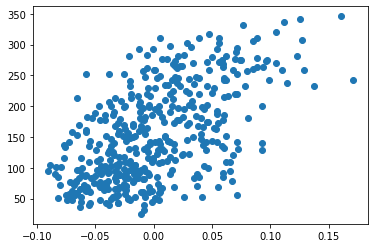

In [5]:
plt.scatter(diabets.data[:, 2], diabets.target) #bmi의 분포를 확인해보자.

In [6]:
X = diabets.data[:, 2]  #bmi지수와 당뇨병 진행도의 관계를 회귀하는 것이 목적
y = diabets.target

## 경사하강법

경사하강법은 
y = w*x + b 에서 w, b 기울기와 절편을 임의 값으로 초기화 시키고 실제 target의 값과 error(오차)를 통하여 w, b를 업데이트 한다.
그 과정에서 오차를 최소화 시키는 방향으로 업데이트를 실시함으로써 모든 데이터 포인트들과의 error가 최소가 되는 w,b를 찾는다.

In [7]:
# 1. 무작위로 {w,b}를 초기화 한다.
w = 1.0
b = 1.0

In [8]:
# 2. X에서 샘플가지고 와서 y_hat을 계산
y_hat = X[0] * w + b
print(y_hat)

1.0616962065186886


In [9]:
# 3. y와 y_hat을 비교 (Error)
print(y[0]-y_hat)

149.9383037934813


In [10]:
# 4-1. y와 y_hat의 결과가 가까워지도록 {w}를 조절
w_inc = w + 0.1
y_hat_inc = X[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [11]:
#변화율을 구하여(미분) w를 업데이트
w_rate = (y_hat_inc - y_hat) / (w_inc-w)
w_new = w + w_rate

In [12]:
# 4-2. y와 y_hat의 결과가 가까워지도록 {b}를 조절
b_inc = b + 0.1
y_hat_inc = X[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [13]:
b_rate = (y_hat_inc - y_hat) / (b_inc-b)
b_new = b + b_rate

## 오차역전파 사용

In [14]:
# error를 구하고 이를 w,b를 업데이트 하는데 반영한다.
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = w + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [15]:
y_hat = X[1] * w_new + b_new
err = y[1] - y_hat
w_rate = X[1]
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

4.881693060477254 -74.41066251735467


In [16]:
for x_i, y_i in zip(X,y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


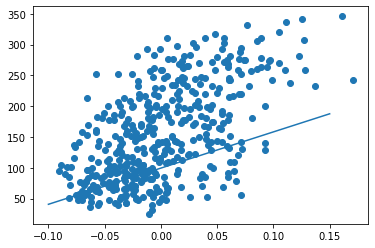

In [17]:
plt.scatter(X,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()

## 경사하강법을 파이썬으로 구현

In [18]:
# 경사하강법을 클래스로 구현하자
class GradientDescent:
  # 1. w,b 설정
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  # 2. y_hat 계산
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat

  # 3. 오차 계산
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # 4. 반복할 수 있도록 EPOCH설정
  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i-y_hat) 
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  # 결론은 w, b를 외부에 제공해야 됨!


In [19]:
gd = GradientDescent()
gd.fit(X,y)

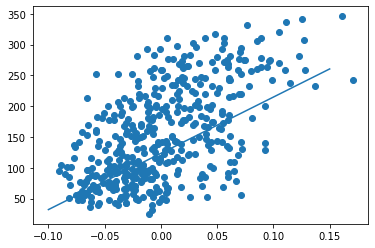

In [20]:
plt.scatter(X,y)
pt1 = (-0.1, -0.1 * gd.w + gd.b)
pt2 = (0.15, 0.15 * gd.w + gd.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()